In [2]:
# data loader using pandas
import pandas as pd
data = pd.read_csv("./housing.csv")
data = pd.DataFrame(data)

data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
data.info()
# we can see tha total_bedrooms have a few missing or null values for a few districts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data['ocean_proximity'].value_counts()
# since its a object type...we need to explore

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'show'

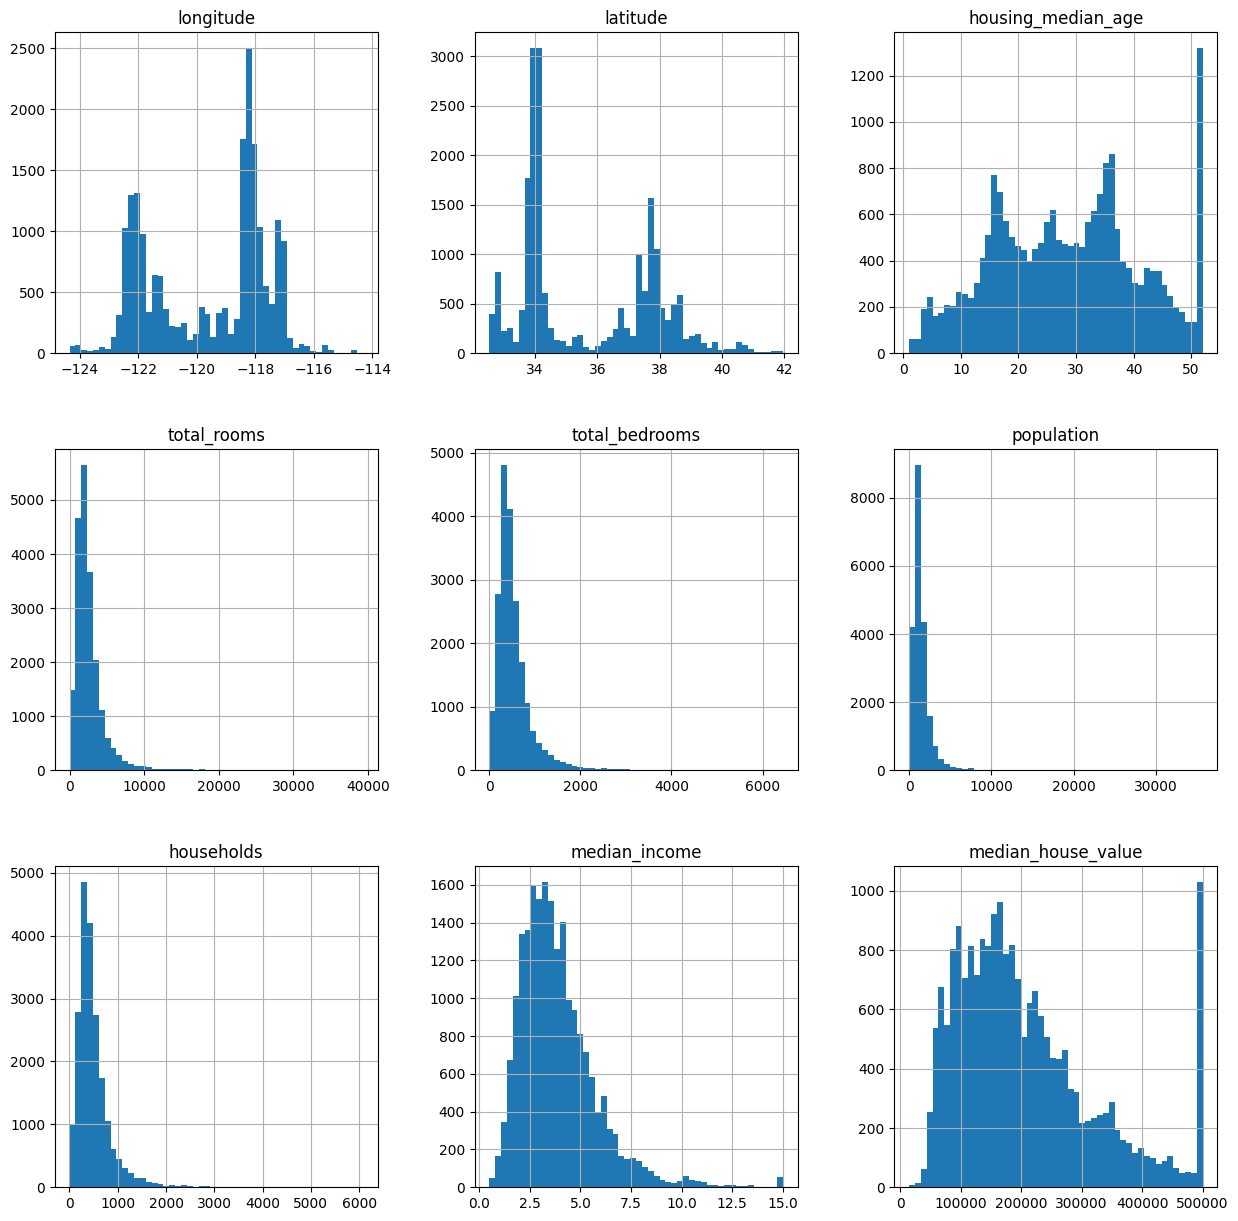

In [6]:
# call hist method, it will plot histogram for each numerical feature of the dataset
import matplotlib as plt
data.hist(bins=50,figsize=(15,15))
plt.show()

In [ ]:
# the median income attribute is capped at 15.00001 for higher median incomes and loest is 0.49999 scaled for lower
# valued incomes.
# median_income value 3 means its $30000 approx.

#similarly hosuing_age and median_housing_value are also capped.
# ML model maynot work for values that go beyond capped values, if we want to do so,
# we collect real values of capped data instances

In [7]:
# create a test set
import numpy as np
def create_test_data(data,test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


In [8]:
train_data,test_data = create_test_data(data,0.2)
print(train_data.head())
print(test_data.head())
# creates different test_data and train_data everytime the code runs., so we use the train_test_split function for getting same shuffled data.

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   
14265      1418.0       355.0         1.9425             93400.0   
2271        874.0       380.0         3.5542             96500.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEA

In [9]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data,test_size=0.2,random_state=42)

print(train_data.head())
print(test_data.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   
14265      1418.0       355.0         1.9425             93400.0   
2271        874.0       380.0         3.5542             96500.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEA

AttributeError: module 'matplotlib' has no attribute 'show'

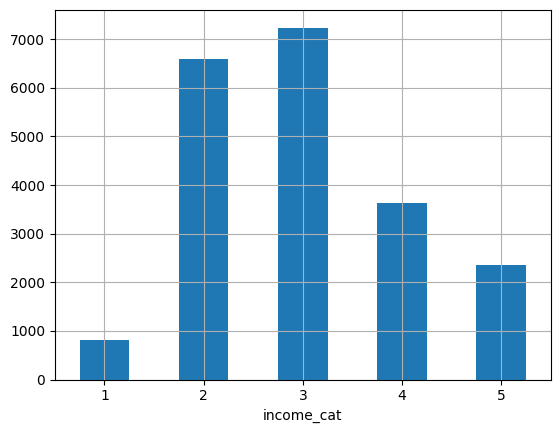

In [16]:
# converting the median_income attribute into a set of bins and labels
import pandas as pd

data['income_cat']=pd.cut(data['median_income'],bins = [0,1.5,3.0,4.5,6.,np.inf],labels = [1,2,3,4,5])
data['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
# plt.xlabel('income category')
# plt.ylabel('count')
plt.show()


In [ ]:

# startified sampling to include all income groups in the training ang testing data
from sklearn.model_selection import StratifiedShuffleSplit

# 10 splits fo data for cross-validation
splitter  = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
datasets = []
for train_index,test_index in splitter.split(data,data['income_cat']):
    train_data2 = data.iloc[train_index]
    test_data2 = data.iloc[test_index]
    datasets.append([train_data2,test_data2])
    # all split datasets in datasets[] array
# access 1st dataset
curr_dataset_train,curr_dataset_test = datasets[0]
# instead of above methods we can use stratified argument train_test_split function


In [14]:
# instead of implementing from scratch
from sklearn.model_selection import train_test_split
strat_train,start_test = train_test_split(data,test_size=0.2,stratify=data['income_cat'],random_state=42)

strat_train['income_cat'].value_counts()

income_cat
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64

<Axes: xlabel='longitude', ylabel='latitude'>

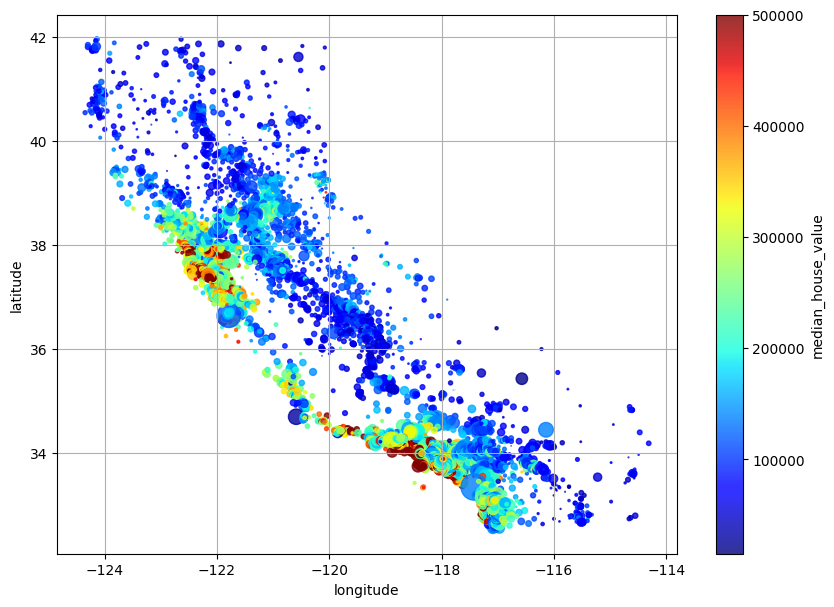

In [23]:
data.plot(kind='scatter',x='longitude',y='latitude',grid=True,
         s=data['population']/100,c='median_house_value',
         cmap = 'jet',colorbar=True,legend=True,figsize=(10,7),alpha=0.8)
# blue is cheap, larger circles
# indicate areas with a larger population
# housing prices are very much related to the location and the population density
# plt.show()

In [27]:
# since the dataset is small we can calculate the correlation coeff. between all the attributes
corr_matrix = data.corr()


ValueError: could not convert string to float: 'NEAR BAY'